利用matplotlib绘制两个共X轴的图形

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.DataFrame({"time":["2018-1-1","2018-10-1", "2019-1-6", "2019-6-6"], "temperature":[23, 25, 18, 34], "A":[100, 321, 231, 145], "B":[167, 217, 312, 278]})
df

,A,B,temperature,time
0,100,167,23,2018-1-1
1,321,217,25,2018-10-1
2,231,312,18,2019-1-6
3,145,278,34,2019-6-6


In [10]:
type(df['time'][0])

str

#### 利用twinx将两个axes进行结合

示例1：

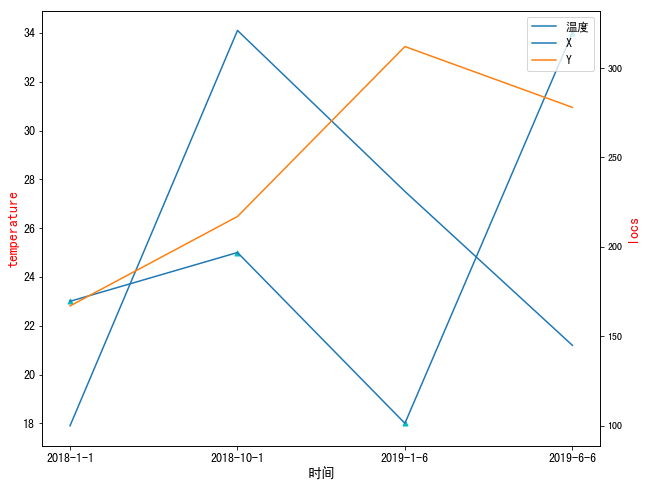

In [32]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1,1,1)   # 添加第一个axes
ax1.plot(df['time'], df['temperature'], label='温度')
ax1.scatter(df['time'], df['temperature'], marker='^', c='c', s=25, label='_nolegend_')   # 通过label='_nolegend_'不放入legend中
ax1.set_xlabel("时间", size=14)
ax1.set_ylabel("temperature", size=14, fontdict={'color':'r'})
ax1.tick_params(labelsize=12)  # 坐标刻度线参数

ax2 = ax1.twinx()   # 共享x轴
ax2.set_ylabel("locs", size=14, fontdict={'color':'r'})
ax2.plot(df['time'], df['A'], label='X')
ax2.plot(df['time'], df['B'], label='Y')
fig.legend(bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes, prop={'size':12}) # 从figure层级解决legend问题
plt.show()

示例2：

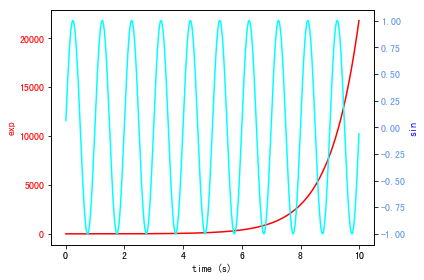

In [37]:
# 创建数据
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)#生成指数数据集
data2 = np.sin(2 * np.pi * t)#生成一个三角函数

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # 实例化一个新的坐标轴，共享同一个x轴
ax2.set_ylabel('sin', color='blue')  # 共享x坐标轴，这里设置其y轴坐标标签
ax2.plot(t, data2, color='aqua')#绘制第二个曲线
ax2.tick_params(axis='y', labelcolor='cornflowerblue')

fig.tight_layout()  # 保证图像被完整显示
plt.show()

#### legend的合并问题

每个axes都有属于自己的legend，上个示例中通过在fig级直接调用legend进行了合并，但要注意通过bbox_to_anchor和bbox_transform参数进行位置调整<br>

两个axes对应两个legend

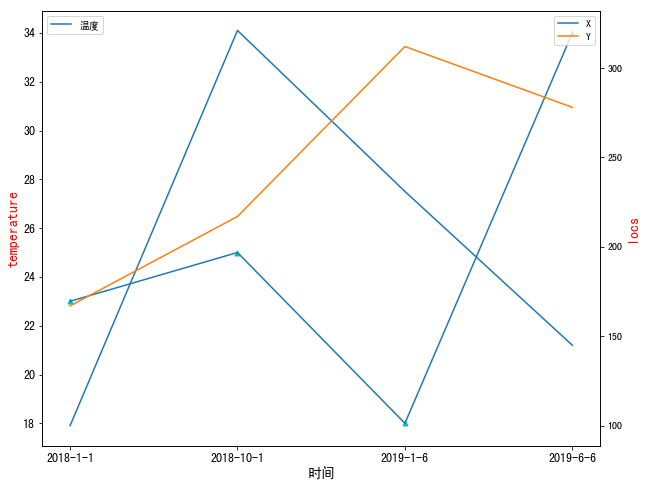

In [33]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1,1,1)   # 添加第一个axes
ax1.plot(df['time'], df['temperature'], label='温度')
ax1.scatter(df['time'], df['temperature'], marker='^', c='c', s=25, label='_nolegend_')   # 通过label='_nolegend_'不放入legend中
ax1.set_xlabel("时间", size=14)
ax1.set_ylabel("temperature", size=14, fontdict={'color':'r'})
ax1.tick_params(labelsize=12)  # 坐标刻度线参数
ax1.legend()

ax2 = ax1.twinx()   # 共享x轴
ax2.set_ylabel("locs", size=14, fontdict={'color':'r'})
ax2.plot(df['time'], df['A'], label='X')
ax2.plot(df['time'], df['B'], label='Y')
ax2.legend() 
plt.show()

另一种做法为：仅用一个axes的legend，但手动改变该legend的内容

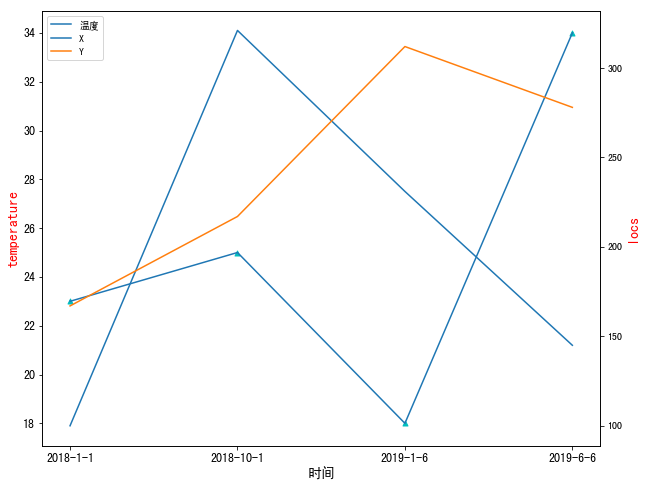

In [34]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1,1,1)   # 添加第一个axes
ln1 = ax1.plot(df['time'], df['temperature'], label='温度')    # 捕捉返回的图
ax1.scatter(df['time'], df['temperature'], marker='^', c='c', s=25, label='_nolegend_')   # 通过label='_nolegend_'不放入legend中
ax1.set_xlabel("时间", size=14)
ax1.set_ylabel("temperature", size=14, fontdict={'color':'r'})
ax1.tick_params(labelsize=12)  # 坐标刻度线参数

ax2 = ax1.twinx()   # 共享x轴
ax2.set_ylabel("locs", size=14, fontdict={'color':'r'})
ln2 = ax2.plot(df['time'], df['A'], label='X')
ln3 = ax2.plot(df['time'], df['B'], label='Y')

lns = ln1 + ln2 + ln3
lbs = [l.get_label() for l in lns]
ax1.legend(lns, lbs, loc=0)
plt.show()

#### 多个子图的共享问题

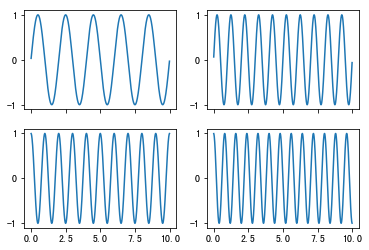

In [38]:
import numpy as np
import matplotlib.pyplot as plt

#生成数据集
t = np.arange(0.01, 10.0, 0.01)
data1 = np.sin(np.pi*t)#生成指数数据集
data2 = np.sin(2 * np.pi * t)
data3=np.cos(2*np.pi*t)
data4=np.cos(2.5*np.pi*t)

fig,ax=plt.subplots(2, 2, sharex=True)#设置sharex参数为True或者all或者col来实现
ax[0, 0].plot(t,data1)
ax[0, 1].plot(t,data2)
ax[1, 0].plot(t,data3)
ax[1, 1].plot(t,data4)
plt.show()

#### 通过寄生轴来实现

In [39]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

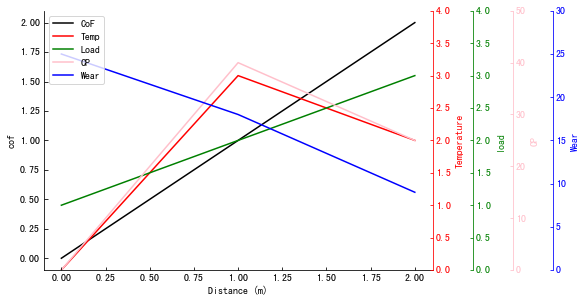

In [40]:
fig = plt.figure(1) #定义figure
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes
ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)



#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('cof')
ax_cof.set_xlabel('Distance (m)')
ax_temp.set_ylabel('Temperature')
ax_load.set_ylabel('load')
ax_cp.set_ylabel('CP')
ax_wear.set_ylabel('Wear')

load_axisline = ax_load.get_grid_helper().new_fixed_axis
cp_axisline = ax_cp.get_grid_helper().new_fixed_axis
wear_axisline = ax_wear.get_grid_helper().new_fixed_axis

ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))
ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''

curve_cof, = ax_cof.plot([0, 1, 2], [0, 1, 2], label="CoF", color='black')
curve_temp, = ax_temp.plot([0, 1, 2], [0, 3, 2], label="Temp", color='red')
curve_load, = ax_load.plot([0, 1, 2], [1, 2, 3], label="Load", color='green')
curve_cp, = ax_cp.plot([0, 1, 2], [0, 40, 25], label="CP", color='pink')
curve_wear, = ax_wear.plot([0, 1, 2], [25, 18, 9], label="Wear", color='blue')


ax_temp.set_ylim(0,4)
ax_load.set_ylim(0,4)
ax_cp.set_ylim(0,50)
ax_wear.set_ylim(0,30)

ax_cof.legend()

#轴名称，刻度值的颜色
#ax_cof.axis['left'].label.set_color(ax_cof.get_color())
ax_temp.axis['right'].label.set_color('red')
ax_load.axis['right2'].label.set_color('green')
ax_cp.axis['right3'].label.set_color('pink')
ax_wear.axis['right4'].label.set_color('blue')

ax_temp.axis['right'].major_ticks.set_color('red')
ax_load.axis['right2'].major_ticks.set_color('green')
ax_cp.axis['right3'].major_ticks.set_color('pink')
ax_wear.axis['right4'].major_ticks.set_color('blue')

ax_temp.axis['right'].major_ticklabels.set_color('red')
ax_load.axis['right2'].major_ticklabels.set_color('green')
ax_cp.axis['right3'].major_ticklabels.set_color('pink')
ax_wear.axis['right4'].major_ticklabels.set_color('blue')

ax_temp.axis['right'].line.set_color('red')
ax_load.axis['right2'].line.set_color('green')
ax_cp.axis['right3'].line.set_color('pink')
ax_wear.axis['right4'].line.set_color('blue')

plt.show()